# Home Assignment No. 3: Part 1 (Theory and Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

## Task 1. Practice with Different Anomaly Detection Algorithms. (5 points)

### Task 1.1. (1 point)

Explore two One-Class SVM methods, write down corresponding minimization functions (try to keep equal notations) and explain the differences (1-2 sentences).

1. Scholkopf et al.: http://papers.nips.cc/paper/1723-support-vector-method-for-novelty-detection.pdf

2. Tax et al.:  https://link.springer.com/content/pdf/10.1023/B:MACH.0000008084.60811.49.pdf

1.  Support Vector Method For Novelty Detection by Schölkopf. Seperated all the from origin in the feature space F and tried to maximize the distance from origin to the hyperplane. Decision boundry in is hyperplane. The method has following quadratic minimization term 

$$ arg \operatorname*{min}_{w,\ \xi_i,\ \rho }\frac{1}{2} ||w||^2 + \frac{1}{\nu n}\sum_{i=1}^n \xi_i - \rho \\ \text{subject to:} \\ (w * (\phi(x))) \geq \rho - \xi_i \\
\xi_i \geq 0  \\ \text{for all } i = 1 \dots n$$

2.  Support Vector Data Description by Tax and Duin (SVDD). This method takes spherical approach(unlike from the previous method) to seperate data in the feature space F. The method wrappes the data in to a sphere in high dimentional space and thus tries to minimize the volume of the sphere so that as small as possible portion of oulayers is incorporated in the decision boundry. The optimization problem is as below, where $R$ is a radious of the sphere and $\textbf{a}$ is a center

$$ arg\operatorname*{min}_{R,\ \mathbf{a} } R^2 + C \sum_{i=1}^n \xi_i  \\
\mbox{ subject to: }  \\ ||x_i - \textbf{a}||^2 \leq R^2 + \xi_i \\ \xi_i \geq 0 \\ \text{for all } i = 1 \dots n $$


**Note**: Both optimization problems are soleved using Langrange techniques, but I won't include them here to keep notation concise

### Task 1.2. (2 points)

1. **(1 pt.)** For the `frod_detection` dataset,  predict the anomaly with any three sklearn built-in Anomaly detection methods: https://scikit-learn.org/stable/modules/outlier_detection.html

**Note:** do not forget to relabel predictions from Anomaly detection methods, as they could be negative.

2. **(1 pt.)** Estimate the __contamination__ (or impurity) on the training set as the ratio of anomaly objects in the whole sample. Explore, how the `roc_auc_score` changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [31]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('data/creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [32]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
import warnings
warnings.filterwarnings('ignore')

clf1 = IsolationForest().fit(train_X)
clf2 = LocalOutlierFactor(novelty=True).fit(train_X)
clf3 = EllipticEnvelope().fit(train_X)

def mapback(x):
  ret = np.empty_like(x)
  ret[x<0],ret[x>0] = 1,0
  return ret

for mod in [("IsolationForest",clf1),('LocalOutlierFactor',clf2),('EllipticEnvelope',clf3)]:
  pred = mod[1].predict(test_X)
  pred = mapback(pred)
  print('--------------------')
  print(mod[0])
  print("roc_auc_score:",roc_auc_score(test_y,pred))
  print("precision_score:",precision_score(test_y,pred))
  

--------------------
IsolationForest
roc_auc_score: 0.8339289302218776
precision_score: 0.3148148148148148
--------------------
LocalOutlierFactor
roc_auc_score: 0.5132358850713281
precision_score: 0.020710059171597635
--------------------
EllipticEnvelope
roc_auc_score: 0.8138939119951779
precision_score: 0.12455516014234876


In [33]:
# impurity estimation on test data
contamination = np.bincount(test_y)[1]/np.bincount(test_y)[0] #Amout of outliyers in the test_data set(stratifeid split)

In [36]:
from sklearn.ensemble import IsolationForest

for i in [0.1, 1, 10]:
    
    # >>> your solution here <<<
    ifor = IsolationForest(contamination=contamination*i, random_state=12).fit(train_X) ## the best algorithm terned out to be Isomaltion map
    labels_isolation = mapback(ifor.predict(test_X))
 
    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y,labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))


Contamination:  0.002   ROC/AUC:  0.52 Precision:  0.984
Contamination:  0.017   ROC/AUC:  0.772 Precision:  0.986
Contamination:  0.172   ROC/AUC:  0.864 Precision:  0.851


### Task 1.3. (2 points)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance.

As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. **(1 pt.)** Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 
2. **(1 pt.)**  Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [7]:
# your favorite classifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as skm
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)
test_X,test_y = np.array(test_X),np.array(test_y)

roc_auc_score = []
pr_score = []
print(*np.bincount(test_y),'unsampled size')
ros = RandomOverSampler(random_state=42)
# test_X, test_y = ros.fit_resample(test_X, test_y)
print(*np.bincount(test_y), 'resampled size')

for train_idx, test_idx in skf.split(test_X,test_y):

    # >>> your solution here <<<
#     model = AdaBoostClassifier(n_estimators=2).fit(test_X[train_idx],test_y[train_idx])
    model = LogisticRegression().fit(test_X[train_idx],test_y[train_idx])
    pred = model.predict(test_X[test_idx])
    roc_auc_score.append(skm.roc_auc_score(test_y[test_idx],pred))
    pr_score.append(skm.precision_score(test_y[test_idx],pred))



print('ROC/AUC mean: ', np.mean(roc_auc_score), 'std: ', np.std(roc_auc_score))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))
print('My favourite classifier is too good i guess')

2844 49 unsampled size
2844 49 resampled size
ROC/AUC mean:  0.8534179639238942 std:  0.11454671502860278
Precision mean:  0.8305952380952382 std:  0.18340911389902217
My favourite classifier is too good i guess


In [8]:
# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

roc_auc_score = []
pr_score = []

ifc = IsolationForest(random_state = 42)


for train_index, test_index in skf.split(test_X, test_y):
  
    ifc.fit(np.concatenate((train_X, test_X[train_index]),axis=0))
    ifcpred = mapback(ifc.predict(test_X[test_index]))
    model.fit(test_X[train_index],test_y[train_index])
    modpred = model.predict(test_X[test_index])
    final_pred = np.logical_and(modpred, ifcpred)
    roc_auc_score.append(skm.roc_auc_score(test_y[test_index],final_pred))
    pr_score.append(skm.precision_score(test_y[test_index],final_pred))
    #     print(np.logical_and(modpred,ifcpred))
print('ROC/AUC mean: ', np.mean(roc_auc_score), 'std: ', np.std(roc_auc_score))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.8146478873239437 std:  0.11832517925624546
Precision mean:  0.95 std:  0.10671873729054748


**Discussion**

After trying a couple of differend classifiers for an ensamble(to be used with Anomaly detection model), I have found out following obseravations:
 * For Tree based classifiers, anomaly detection method will not provide substantionaly imporovement for they are capable of learning data too well even on test set.
 * SVM classifiers provided terible results, thus could have been coupled with anomally dection methods
 * Using `logical_and` operand yeilded better results than `logical_or` when LogisticRegression classifier was chosen to be coupled with Anomaly detection. Mean presion and std jumped from `0.7636904761904761 std:  0.1940521837032503` to `0.95 std:  0.10671873729054748`, wheare as mean ROC/AUC and std fell from `0.9808802299871566 std:  0.05039047077369414` to `0.8146478873239437 std:  0.11832517925624546`

## Task 2. Practice with Different Clustering Algorithms. (4 points) 

### Task 2.1. Explore KMeans and Gaussian Mixture algorithms. (2 points)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. **(1 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. **(1 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

True number of clusters is 15


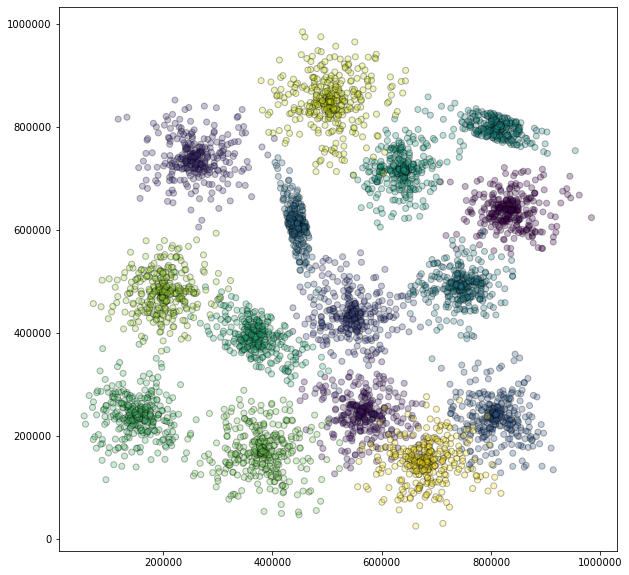

In [9]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [10]:
### BEGIN Solution
from sklearn.cluster import KMeans, Birch, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

# X = StandardScaler().fit_transform(points)
X = points
y = labels

print("slhouette_score for true labels:",silhouette_score(X, y),'\n')

models = [KMeans(n_clusters=15), GaussianMixture(n_components=15), 
          Birch(n_clusters=15)]

kmean = {}
gaus = {"covariance_type":['full', 'tied', 'diag', 'spherical']}
birch = {'branching_factor': [1,2,5,8,10], 'threshold':[5,10,15,20]}
# agg = {'linkage':["ward", "complete", "average", "single"], 'affinity':["euclidean", "l1", "l2"]}

params = [kmean,gaus,birch]

for mod,par in zip(models, params):
    clf = GridSearchCV(mod,param_grid=par,cv = 3, scoring='mutual_info_score')
    clf.fit(X,y)
    print(mod.__class__.__name__)
    print("silhouette_score:", silhouette_score(clf.predict(X).reshape(-1,1),y))
    print("mutual_info_score:", mutual_info_score(y,clf.predict(X)))
    print(clf.best_params_,'\n\n')

clf = AgglomerativeClustering(n_clusters=15).fit(X,y)
print(f'{clf.__class__.__name__}')
print("silhouette_score:", silhouette_score(clf.labels_.reshape(-1,1),y))
print("mutual_info_score:", mutual_info_score(y,clf.labels_))


### END Solution

slhouette_score for true labels: 0.6088944608894215 

KMeans
silhouette_score: 0.7673563895939435
mutual_info_score: 2.560612815598386
{} 


GaussianMixture
silhouette_score: 0.7875279814392642
mutual_info_score: 2.567500298256902
{'covariance_type': 'full'} 


Birch
silhouette_score: 0.6358017797815118
mutual_info_score: 2.5077832875665407
{'branching_factor': 2, 'threshold': 15} 


AgglomerativeClustering
silhouette_score: 0.6358017797815118
mutual_info_score: 2.5077832875665407


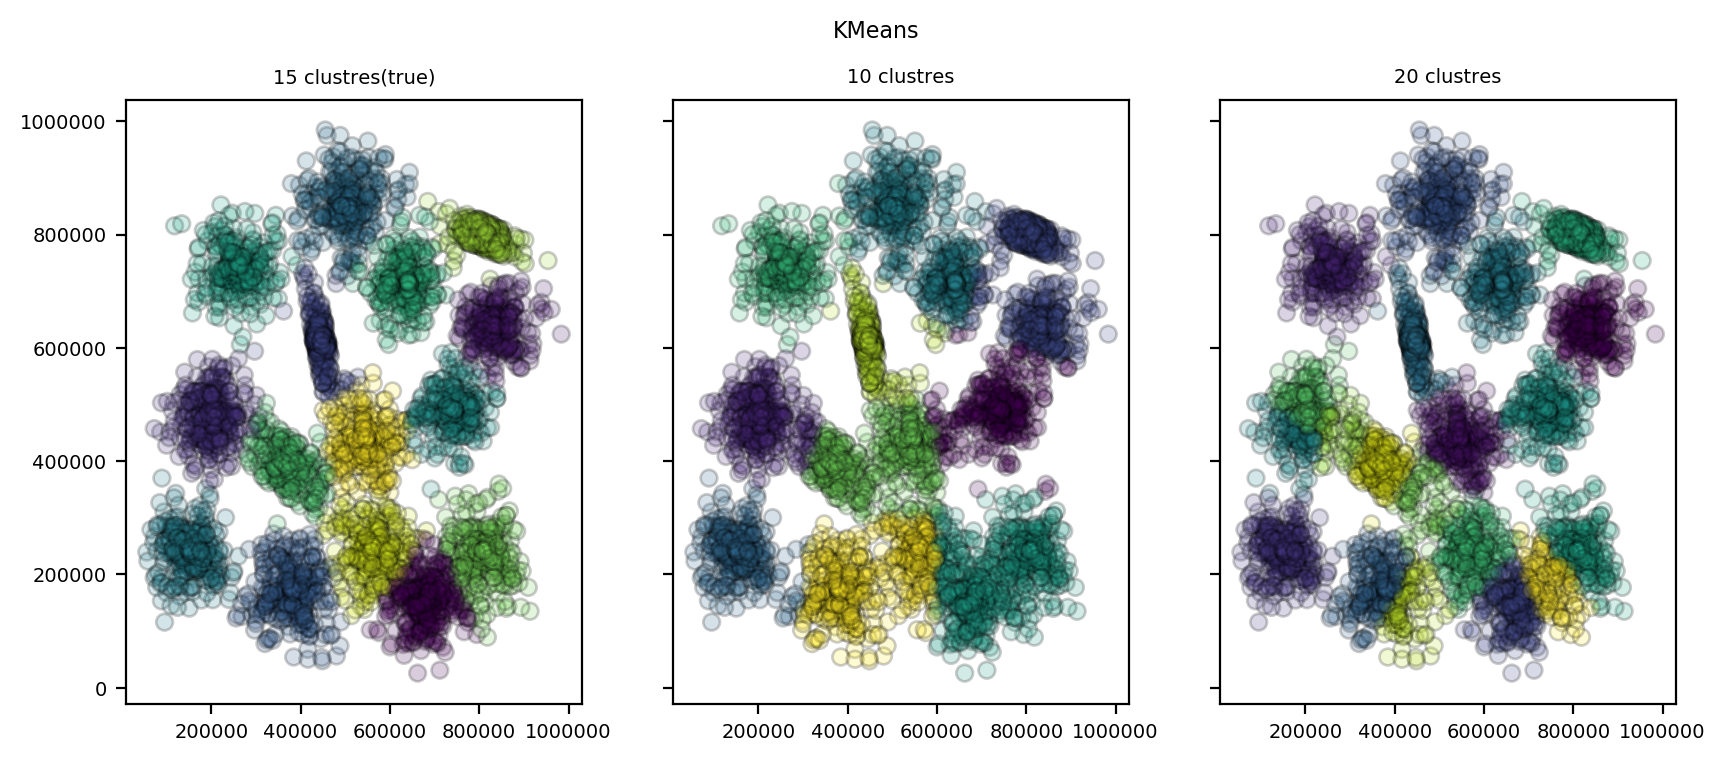

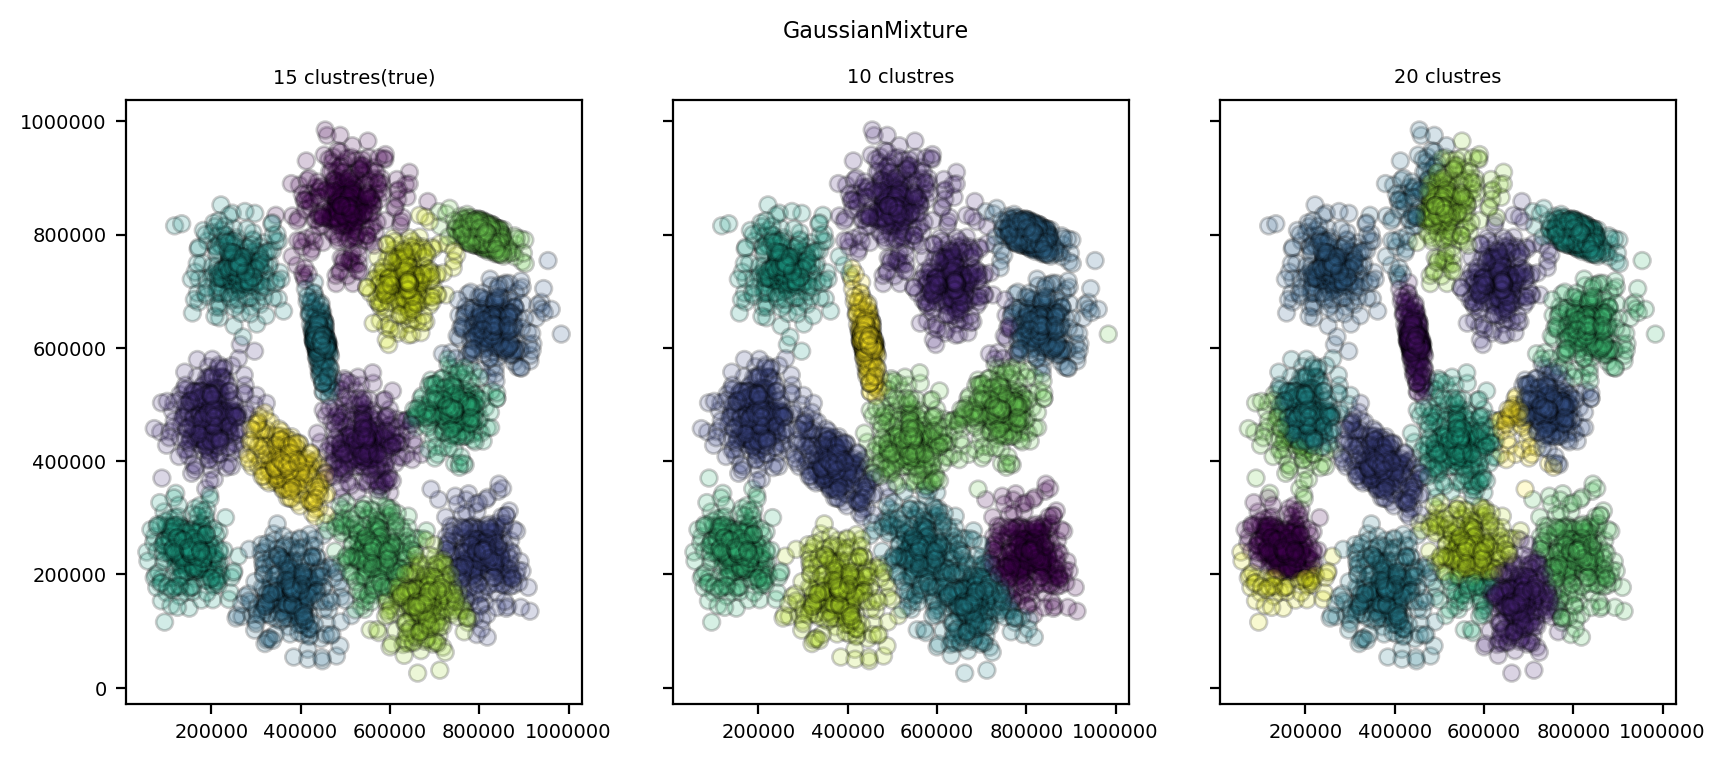

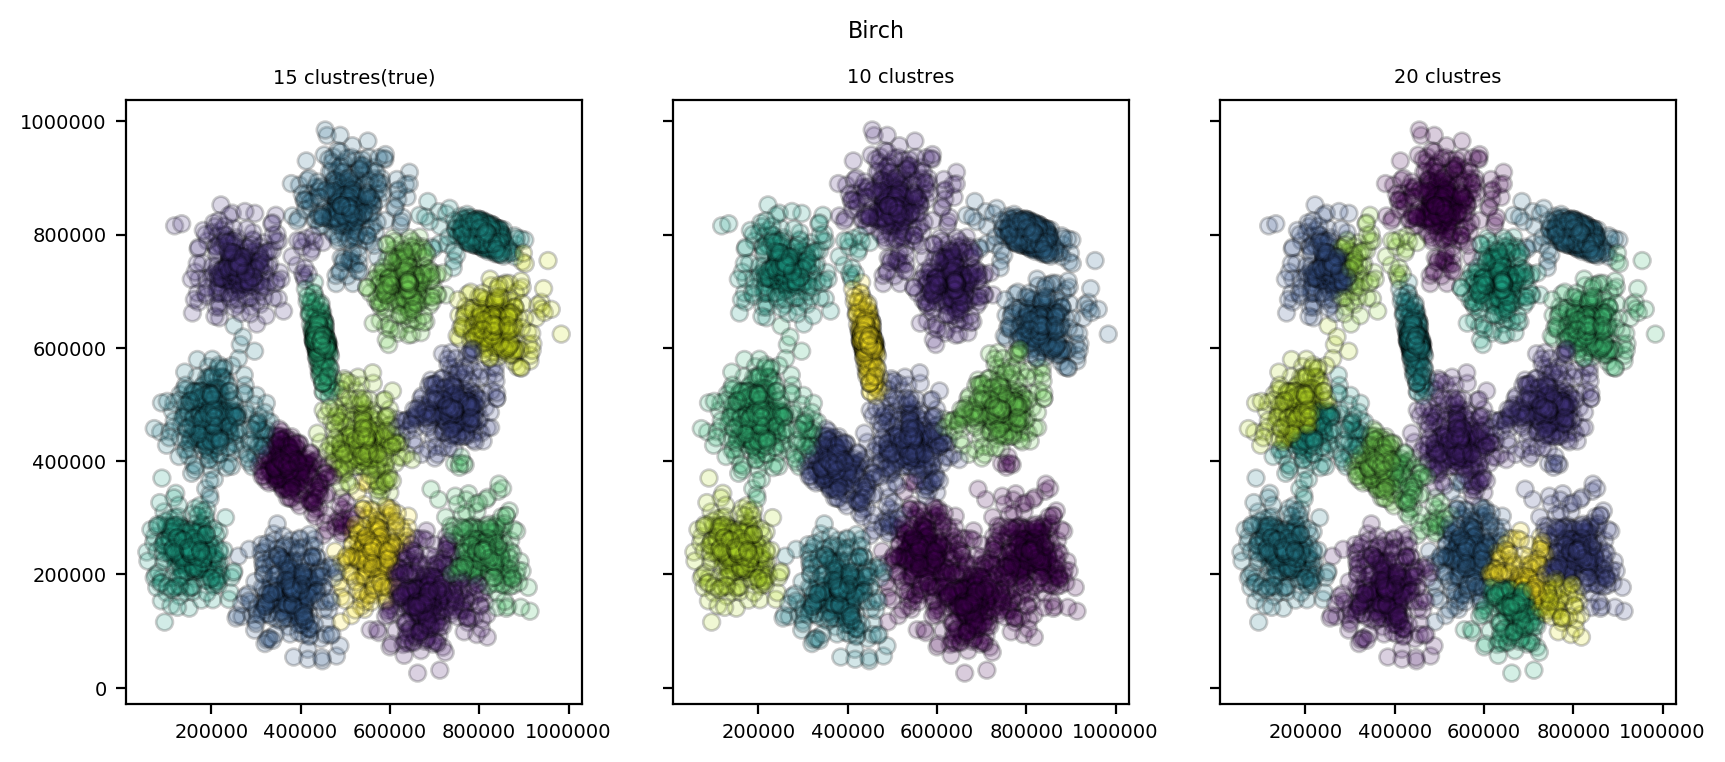

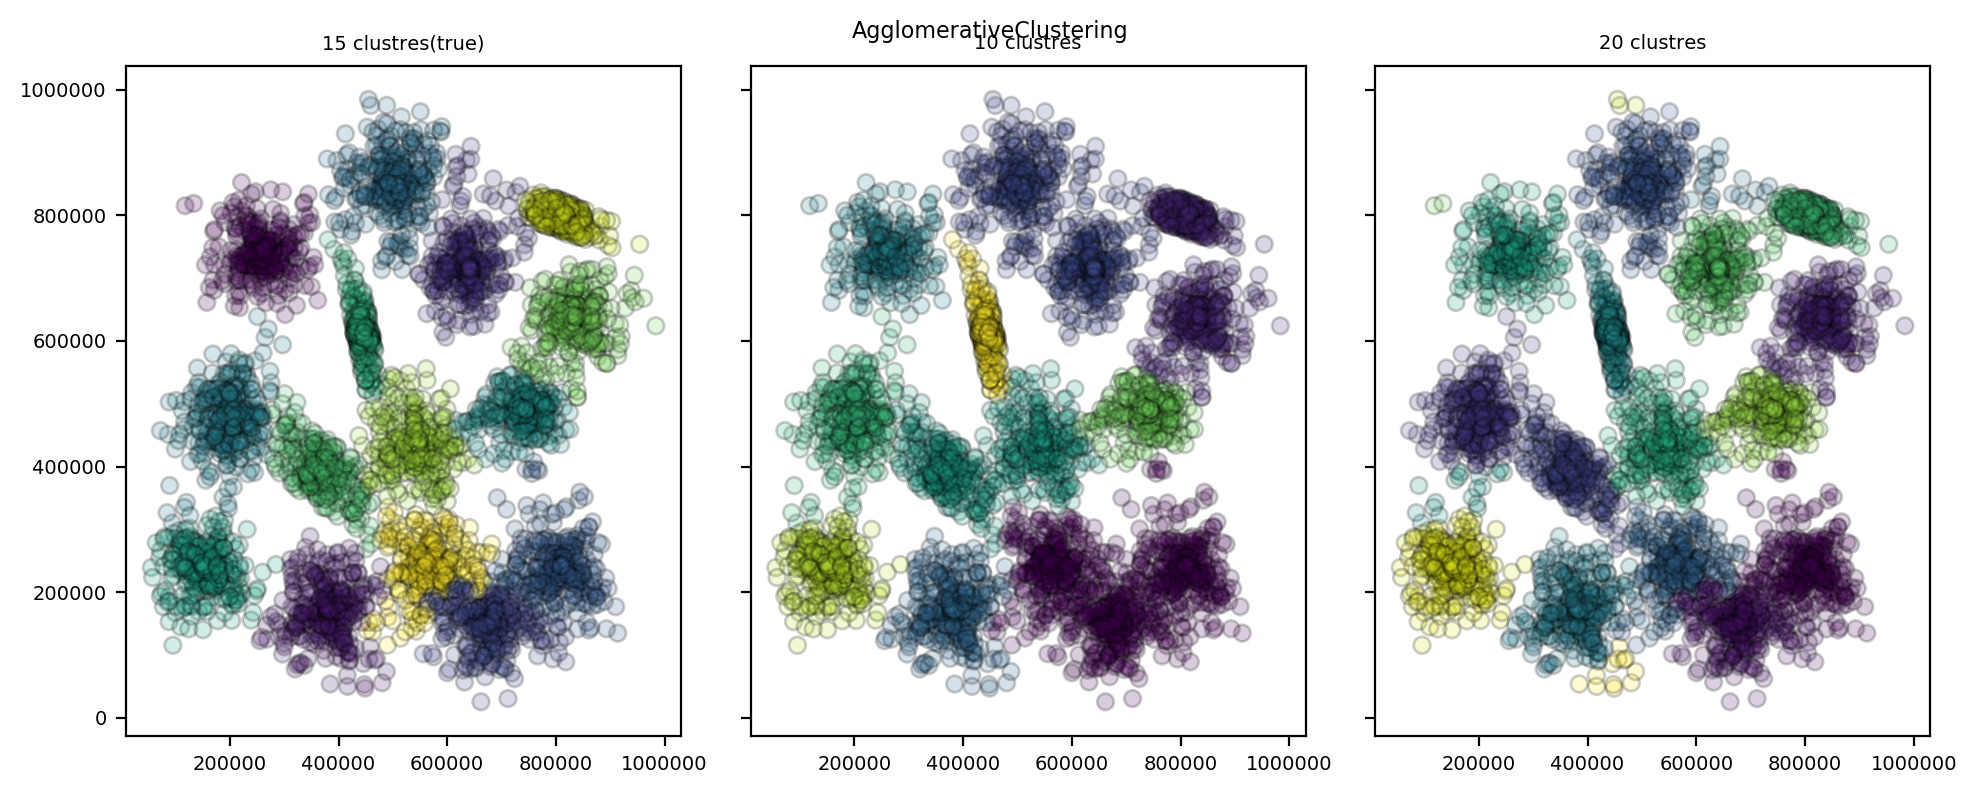

In [11]:
# Apply the algorithm with the true number of clusters and at least two other
# settings for the number of clusters: a smaller and a larger number than the true one;

### BEGIN Solution

models = [KMeans(), GaussianMixture(covariance_type='full'), 
          Birch(n_clusters=15, branching_factor = 2, threshold = 15),
          AgglomerativeClustering(linkage="average",affinity='euclidean')]
Swierd_metric = []
Mwierd_metric = []

for row,model in enumerate(models):
  
  slit = []
  mlit = []
  fig, ax = plt.subplots(1,3, figsize=(10,4),sharey=True,dpi=200)
  plt.suptitle(model.__class__.__name__,size=8)
  
  for col,i in enumerate([15,10,20]):  
    try:
      model.set_params(n_clusters = i)
    except:
      model.set_params(n_components = i)
      
    # fit the model and plot
    model.fit(X)
    pred = model.labels_ if model.__class__.__name__ ==  "AgglomerativeClustering" else  model.predict(X)
    ax[col].scatter(X[:,0],X[:,1], c=pred, alpha=0.2, edgecolor='k')
    ax[col].set_title(f"{i} clustres(true)",size=7) if i == 15 else  ax[col].set_title(f"{i} clustres",size=7)
    ax[col].tick_params(labelsize=7)
    
    # Save the predction resutls
    silhouette_score(pred.reshape(-1,1),y)
    mutual_info_score(y,pred)
     
plt.tight_layout()
plt.show()
  
### END Solution

In [12]:
# vizualize the clustering result, calculate the clustering metrics and plot them;
### BEGIN Solution

# Apply the algorithm with the true number of clusters and at least two other
# settings for the number of clusters: a smaller and a larger number than the true one;

### BEGIN Solution

clustres = list(range(10,20,1))

models = [KMeans(random_state=12), GaussianMixture(random_state=12, covariance_type='full'), 
          Birch(n_clusters=15, branching_factor = 2, threshold = 15),
          AgglomerativeClustering(linkage="average",affinity='euclidean')]

Swierd_metric = []
Mwierd_metric = []
for row,model in enumerate(models):
  slit = []
  mlit = []
  for col,i in enumerate(clustres):  
      try:
        model.set_params(n_clusters = i)
      except:
        model.set_params(n_components = i)
      # fit the model and plot
      model.fit(X)
      pred = model.labels_ if model.__class__.__name__ ==  "AgglomerativeClustering" else  model.predict(X)
      # Save the predction resutls
      slit.append(silhouette_score(pred.reshape(-1,1),y))
      mlit.append(mutual_info_score(y,pred))
  Swierd_metric.append(slit)
  Mwierd_metric.append(mlit)

### END Solution

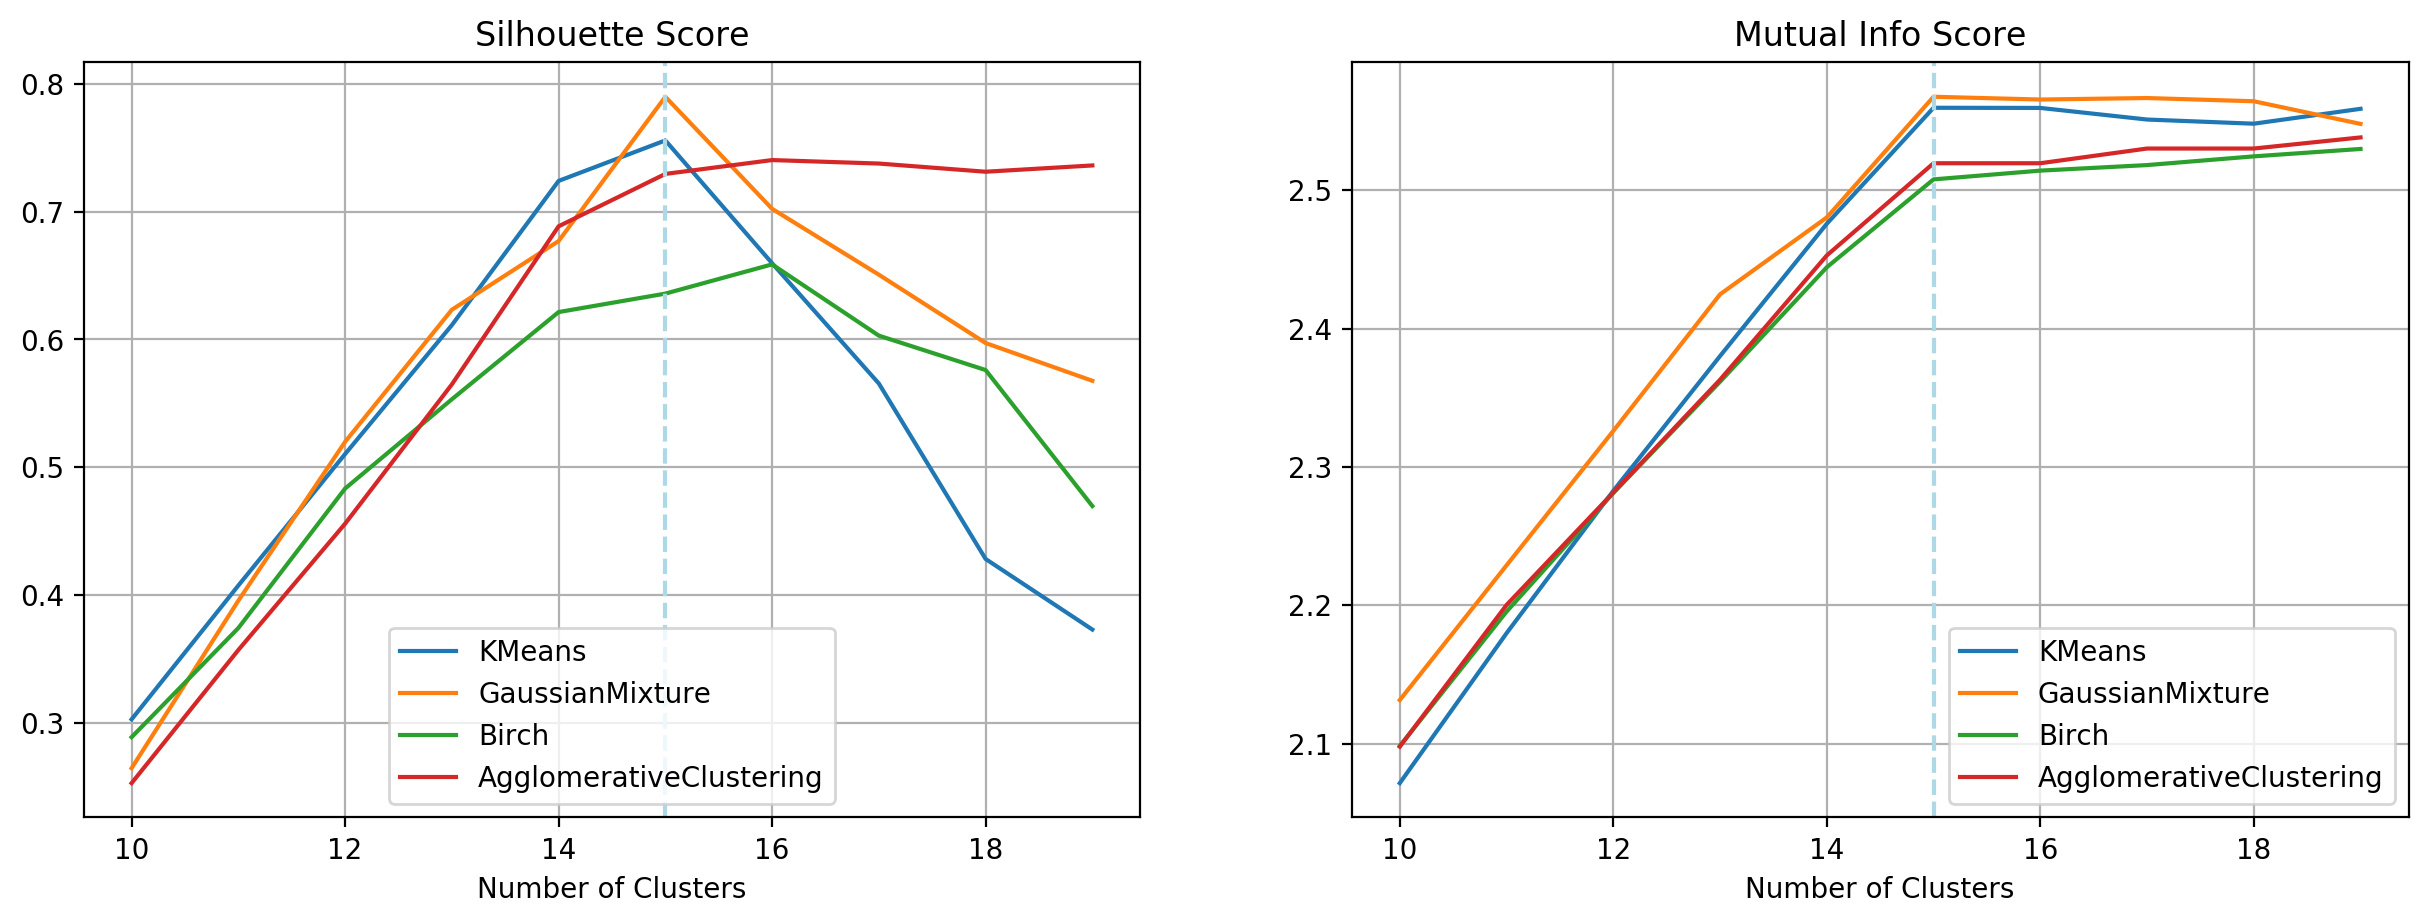

In [13]:
metrics = ["Silhouette Score",'Mutual Info Score']
names = [m.__class__.__name__ for m in models]
plt.figure(figsize=(15,5),dpi=200)
for i, metric in enumerate(metrics):
  plt.subplot(1,2,i+1)
  plt.title(metric)
  plt.xlabel("Number of Clusters")
  for j in range(len(Swierd_metric)):
    plt.plot(clustres,Swierd_metric[j]) if i==0 else plt.plot(clustres,Mwierd_metric[j])
  plt.legend(names)
  plt.axvline(15, linestyle='dashed', color='lightblue')
  plt.grid()


### Task 2.2. Finding the Number of Clusters with Bootstrap. (2 points)

For a chosen algorithm find the best number of clusters using bootstrap.

So first based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.

1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence interval (CI)**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__  
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

In [14]:
import scipy

from tqdm import tqdm_notebook, tqdm
from scipy import stats

### BEGIN Solution
cluster_ns = list(range(10,19,1)) # >>> your solution here <<<
sample_number = 50 # >>> your solution here <<<
mu = []
low = []
upp = []
for n_clusters in tqdm_notebook(cluster_ns):
    # >>> your solution here <<<
    metric = []
    for samplings in tqdm_notebook(range(sample_number)):
      indx = np.random.randint(0,len(X),len(X)//2)
      pred = KMeans(n_clusters=n_clusters).fit_predict(X[indx,:])
      wierdmetric = silhouette_score(X[indx,:],pred)
      metric.append(wierdmetric)
    lower, upper = stats.norm.interval(0.95, loc=np.mean(metric), scale=np.std(metric))
    mu.append(np.mean(metric))
    low.append(lower)
    upp.append(upper)
    print("Variance: ", np.var(metric))
    print("Number of clusters:",n_clusters)
    print("\t Confidence interval:",(lower,upper)) 
    
    
### END Solution


Variance:  5.089354580508784e-05
Number of clusters: 10
	 Confidence interval: (0.5039871772187215, 0.5319518306547543)



Variance:  5.385143988381239e-05
Number of clusters: 11
	 Confidence interval: (0.5239637706999303, 0.5527295899129303)



Variance:  3.847712344153911e-05
Number of clusters: 12
	 Confidence interval: (0.5491920933341311, 0.5735073794923845)



Variance:  4.975318125945855e-05
Number of clusters: 13
	 Confidence interval: (0.5712051452484174, 0.5988547236905376)



Variance:  2.8787309142117677e-05
Number of clusters: 14
	 Confidence interval: (0.6013237725177426, 0.6223556780546203)



Variance:  2.4848153132086618e-05
Number of clusters: 15
	 Confidence interval: (0.6162258097931625, 0.6357658361009455)



Variance:  4.1337167525551924e-05
Number of clusters: 16
	 Confidence interval: (0.5979970323979985, 0.6231998121505212)



Variance:  5.372957001953056e-05
Number of clusters: 17
	 Confidence interval: (0.5799656394519848, 0.6086988906208746)



Variance:  7.519742589057592e-05
Number of clusters: 18
	 Confidence interval: (0.5608231663958747, 0.5948153899171946)



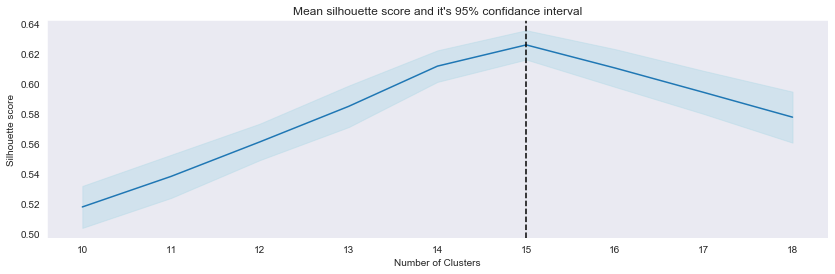

In [15]:
import seaborn as sns
sns.set_style('dark')
plt.figure(figsize=(14,4))
plt.plot(cluster_ns,mu)
plt.fill_between(cluster_ns,upp,low,alpha=0.4,color='lightblue')
plt.title('Mean silhouette score and it\'s 95% confidance interval')
plt.axvline(15,linestyle='dashed', c='black')
plt.ylabel('Silhouette score')
plt.xlabel('Number of Clusters');

## Task 3. MNIST, kMNIST component analysis and manifold learning. (6 points)

### Task 3.1. (2 points)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimentionality, decompose the dataset on pinciple components and estimate the cumulative explained variance by each component.

You can either use the proposed method https://www.stat.berkeley.edu/~bickel/mldim.pdf for the sample intrinsic dimention estimation or any other convenient for you. For the first case use can use relised code from here https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4 

1. **(1 pt.)** Estimate the intrinsic dimentionality of the dataset. Provide the plot.
2. **(1 pt.)** Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [16]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set()

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)

In [17]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstanec betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, verbose=True, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    if verbose:
      iters=tqdm(iters)
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

In [18]:
# Estimate the intrinsic dimentionality of the dataset. 

### BEGIN Solution
k1,k2 = 2,70
results = repeated(intrinsic_dim_scale_interval,data,nb_iter=20, mode='bootstrap',k1=k1,k2=k2)

### END Solution

100%|██████████| 20/20 [02:58<00:00,  8.93s/it]


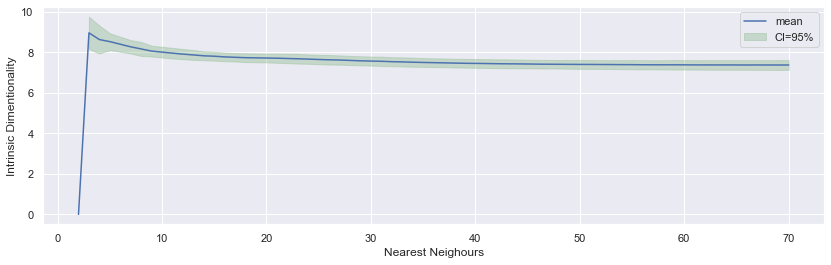

In [19]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

resultss = np.array(results)
numbers = range(2,71,1)
mu =np.mean(resultss,axis=0)

std = np.std(resultss,axis=0)
upper, lower = stats.norm.interval(0.95, loc=mu, scale=std)

plt.figure(figsize=(14,4))
plt.plot(numbers,mu,label='mean')
plt.fill_between(numbers,upper,lower,alpha=0.4,color='darkseagreen',label='CI=95%')
plt.ylabel('Intrinsic Dimentionality')
plt.xlabel('Nearest Neighours');
plt.legend()
plt.grid()


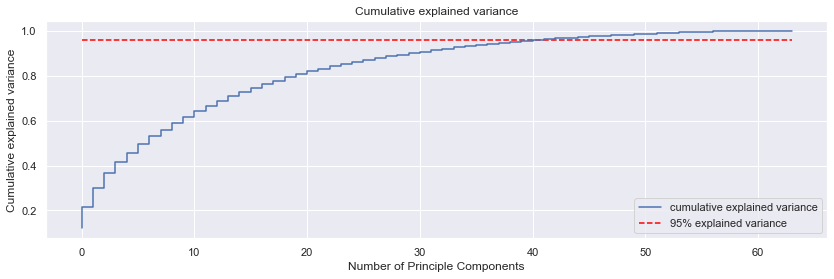

In [20]:
# Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component.
from sklearn.decomposition import PCA

### BEGIN Solution
tr_data = PCA(n_components=data.shape[1]).fit(data)
cum = np.cumsum(tr_data.explained_variance_)

plt.figure(figsize=(14,4))
plt.step(range(64),cum/sum(tr_data.explained_variance_),label='cumulative explained variance')
plt.hlines(0.96,0,63,linestyles='dashed',color='red', label='95% explained variance')
plt.title('Cumulative explained variance')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of Principle Components')
plt.legend(loc='lower right')
plt.grid()
### END Solution

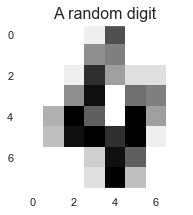

In [21]:
# Plot the example of back-decomposition with 6 different 
# set of components and corresponding explained variance. You can choose any digit from the dataset.

plt.figure(5, figsize=(3, 3))
plt.imshow(dg.images[4], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('A random digit', fontsize=16)
plt.show()

y = dg.target
X = dg.images.reshape(-1, 8*8) / dg.images.max()

[]

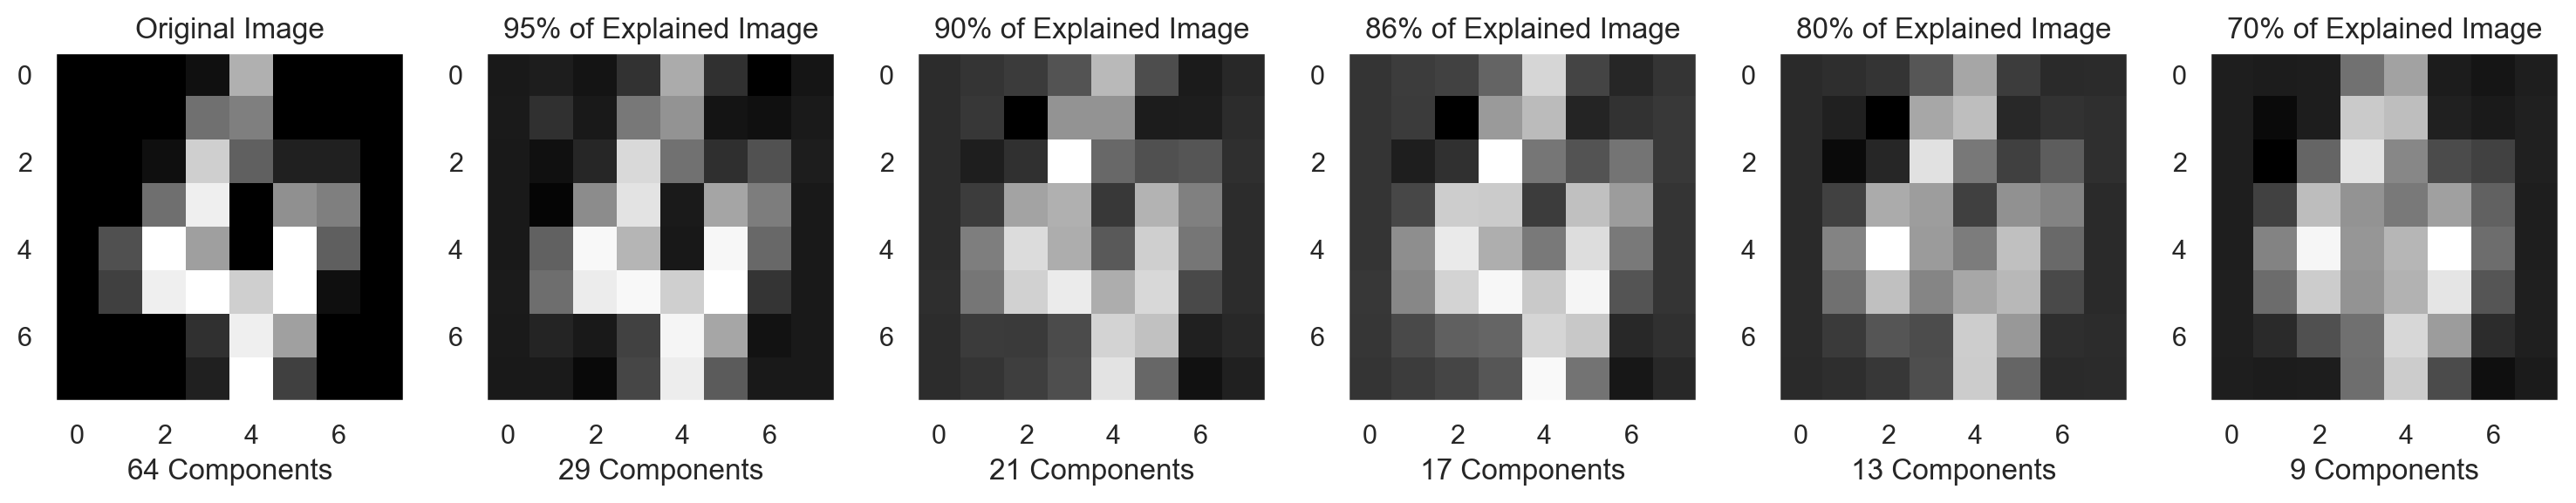

In [22]:
### BEGIN Solution
fig, ax = plt.subplots(1,6,figsize=(15,15),dpi=200)
ax = ax.flatten()
var64 = PCA(n_components=64).fit(X).explained_variance_
for j,i in enumerate([64,29,21,17,13,9]):
  trans = PCA(n_components=i).fit(X)
  images = trans.inverse_transform(trans.transform(X))
  var_les = np.cumsum(trans.explained_variance_[:i])
  ax[j].imshow(images[4].reshape(8,8),cmap=plt.cm.gray, interpolation='nearest')
  ax[j].set_xlabel(f'{i} Components')
  ax[j].set_title('Original Image') if i == 64 else ax[j].set_title('{}% of Explained Image'.format(int(var_les[-1]/sum(var64)*100.0)))
plt.tight_layout()
plt.plot()
### END Solution

### Task 3.2. (2 points)

Here we will visualise the decompocition, to observe how the data diverges across different manofild learning methods. We are  to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracies on the new features. 

1. Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Be sure the data in whitened (scaled), enjoy nice plots :) 
2. **(1 pt.)** Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according your estimation of intrinsic dimention**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
3. **(1 pt.)** Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 senteces.

__NOTE:__ In first task, `plotly` will not display the plot in offline notebook, so it is just for you to visualize the projection in 3D.

In [9]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import colorlover as cl
import pandas as pd

init_notebook_mode(connected=True)

In [14]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap
from sklearn import datasets



### BEGIN Solution

# >>> your solution here <<<
digits = datasets.load_digits()
comps=3
pca = PCA(n_components=comps).fit_transform(digits.data)
iso = Isomap(n_components=comps).fit_transform(digits.data)
ica = FastICA(n_components=comps).fit_transform(digits.data)

S_pca_= pca

### END Solution

In [15]:
digits_3d = pd.DataFrame({
    'x': S_pca_[:, 0], 
    'y': S_pca_[:, 1], 
    'z': S_pca_[:, 2],
    'label': digits['target'],
})

colors = cl.scales['10']['qual']['Paired']
data = []

for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    
    color = colors[i]
    
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization PCA',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

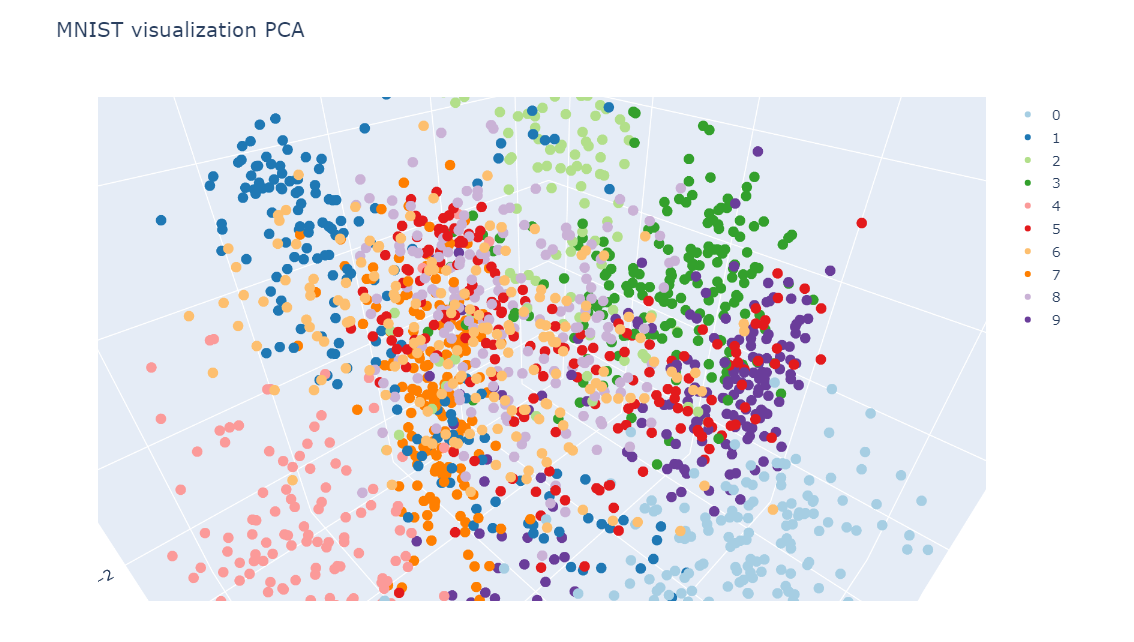

In [29]:
from IPython.display import Image
Image("pca.png")

In [46]:
# Calculate new features on the data with ICA, PCA and Isomap and the classification accuracy on these features 

from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA,FastICA
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()
data = StandardScaler().fit_transform(dg.data)
int_dim = 9

logreg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
models = [PCA(n_components=int_dim),
          FastICA(n_components=int_dim),
          Isomap(n_components=int_dim,eigen_solver='dense')]

### BEGIN Solution
accuracy = []
std = []
for model in models:
  print(model)
  data_tras = model.fit_transform(data)
  mid_acc = []
  for train_index, test_index in rkf.split(data_tras):
    x_train,x_test = data_tras[train_index], data_tras[test_index]
    y_train,y_test = dg.target[train_index], dg.target[test_index]
    logreg.fit(x_train,y_train)
    mid_acc.append(accuracy_score(y_test,logreg.predict(x_test)))
  accuracy.append(mid_acc)
#   std.append(np.std(mid_acc))
  
scores = list()

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
        n_components=9, random_state=None, tol=0.0001, w_init=None,
        whiten=True)
Isomap(eigen_solver='dense', max_iter=None, metric='minkowski',
       metric_params=None, n_components=9, n_jobs=None, n_neighbors=5,
       neighbors_algorithm='auto', p=2, path_method='auto', tol=0)


In [47]:
np.mean(np.array(accuracy),axis=1)

array([0.8770195 , 0.73066904, 0.95565769])

In [48]:
df = pd.DataFrame({'dim.reduction method':['PAC','ICA','Isomap'],
                    'mean accuracy':np.mean(np.array(accuracy),axis=1),
                    'std':np.std(np.array(accuracy),axis=1)})

df

dim.reduction method  mean accuracy       std
0                  PAC       0.877019  0.018011
1                  ICA       0.730669  0.031977
2               Isomap       0.955658  0.010999

In [29]:
pca_vs_ica = stats.ttest_ind(accuracy[0],accuracy[1])
print("Statistically significant improvement of PCA decomposition over ICA: p-value ",pca_vs_ica[1])

Statistically significant improvement of PCA decomposition over ICA: p-value  1.8319144034865207e-14


In [30]:
isomap_vs_pca = stats.ttest_ind(accuracy[2],accuracy[0])
print("Statistically significant improvement of Isomap decomposition over PCA: p-value ",pca_vs_ica[1])

Statistically significant improvement of Isomap decomposition over PCA: p-value  1.8319144034865207e-14


**Discussion**

* **PCA** used first $n$ largest singular values to explain the data. In this case $n=9$. We must keep in mind tha PCA uses linear trasformations to explain the most imortant data, thus is a linear dimentionality reduction method. Also, PCA tries to preserve general structure therefore not all cases data could be seperable in the reduced dimentionality. 

* **ICA** The difference between PCA and ICA is that the former tries to find a reduced-rank representation of the data whereas ICA tried to represent data as independent sub-elements. If the original data is not linearly seperable them ICA will yeald bad result since non linearly related data can not be seperated by linear methods

* **Isomap** uses non-linear trasformation that tries to keep ditances between points the same in the manifold. Thus is superior to PCA. One of the limations is that to use this method the data must be highly non-linear. As we can see in the table above, Isomaps resutls are better and specfically the variance is much smaller than that of PAC's

### Task 3.3. kMNIST dimensionality reduction. (2 points)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engeneer new features with any familiar to you method of Manifold Learning to inclearse the classification accuracy. Use the `KNN` classifier with any hyperparameters your'll choose.

1. __(2 pt.)__ Get accuracy on `test_set` more than `93%`. Is it fair to `fit` with manifold Learning method for both train and test samples? 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performances on `MNIST`. These methods can compete with Autoencoders on `torch`, you will find it in __Part 2__.  Save 3 first components of your projection on `train` sample to `.csv`, we are going to visually compare them later.


In [37]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('data/kmnist/kmnist-train-imgs.npz')
x_test = load('data/kmnist/kmnist-test-imgs.npz')
y_train = load('data/kmnist/kmnist-train-labels.npz')
y_test = load('data/kmnist/kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

### BEGIN Solution
x_train.shape

x_train_iso = PCA(n_components=350).fit(x_train)
cum = np.cumsum(x_train_iso.explained_variance_)

# >>> your solution here <<<

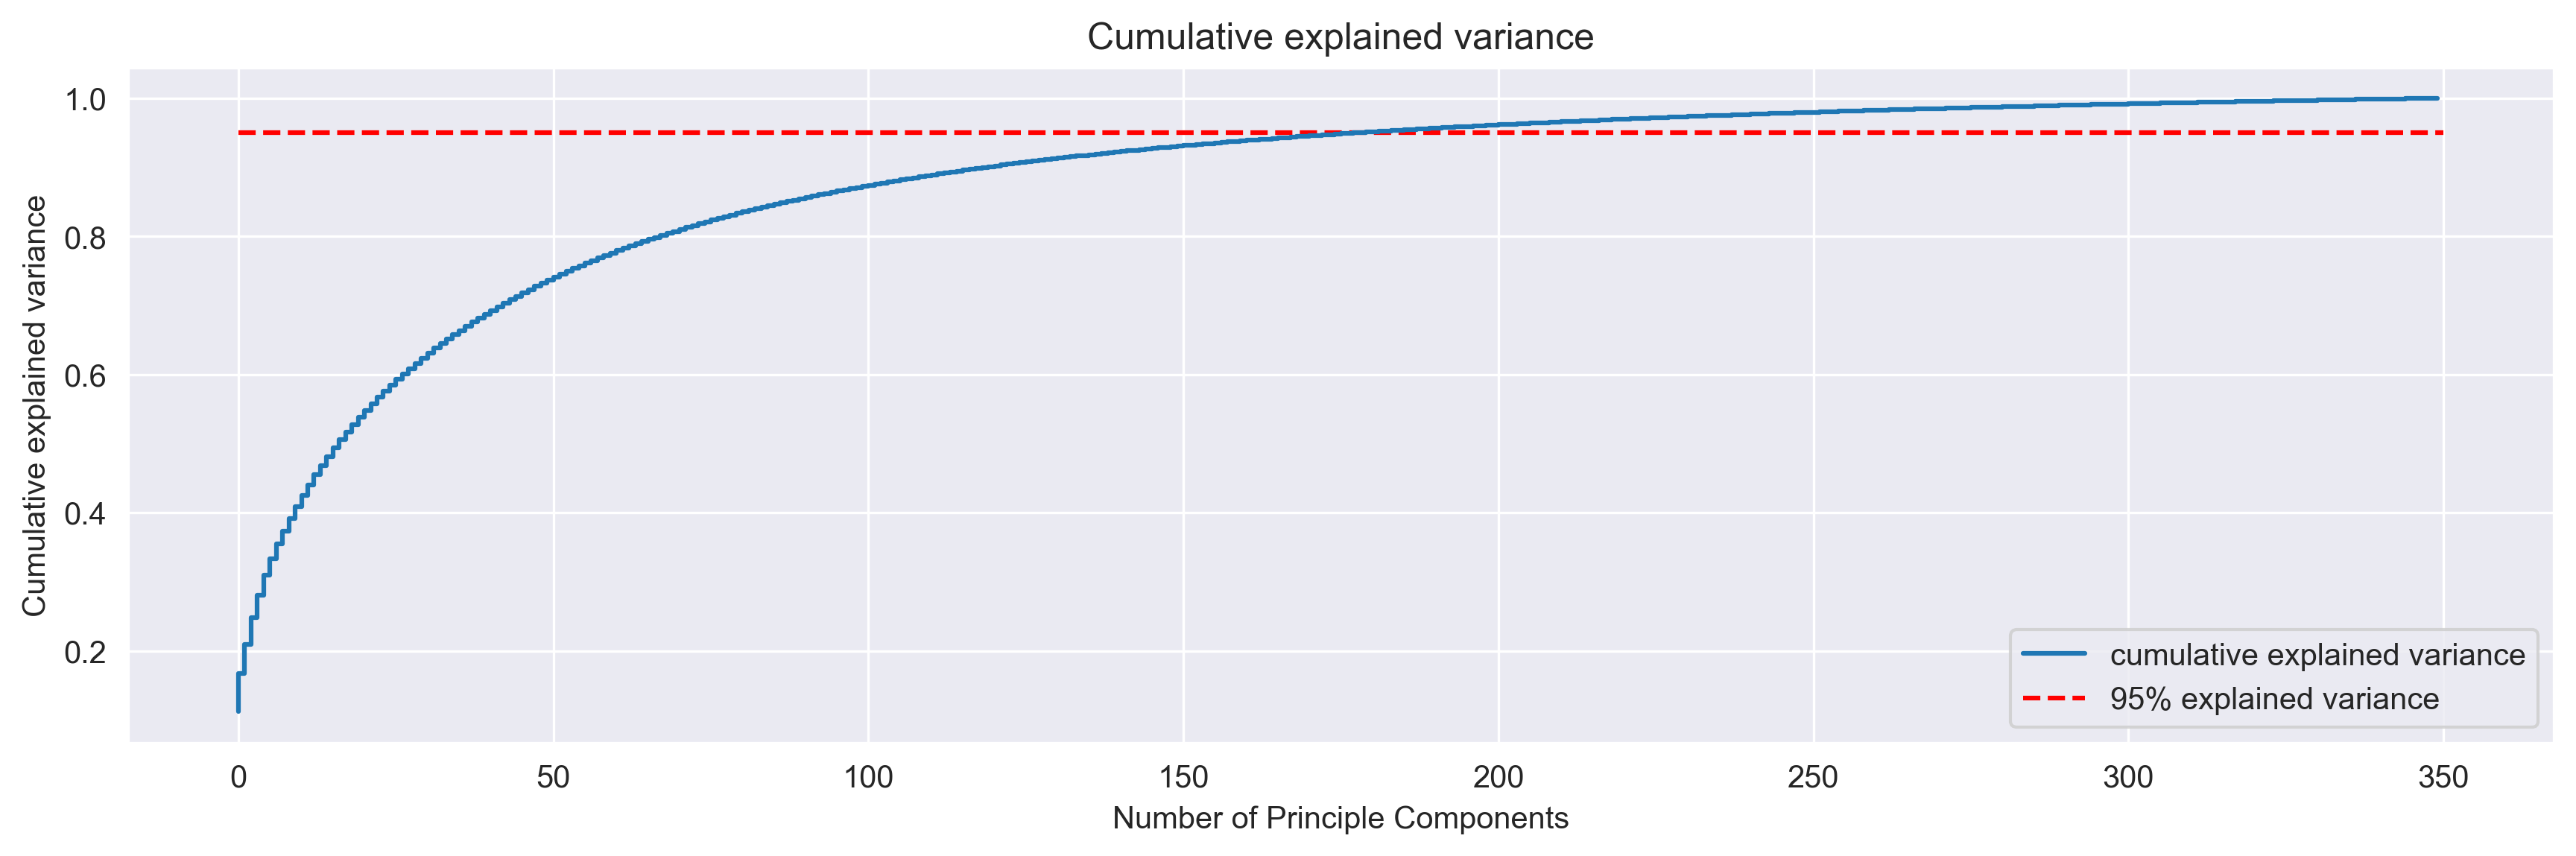

In [38]:

plt.figure(figsize=(14,4),dpi=300)
plt.step(range(350),cum/sum(x_train_iso.explained_variance_),label='cumulative explained variance')
plt.hlines(0.95,0,350,linestyles='dashed',color='red', label='95% explained variance')
plt.title('Cumulative explained variance')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of Principle Components')
plt.legend(loc='lower right')
plt.grid()


In [66]:
import pandas as pd

to_save = PCA(n_components=100).fit_transform(np.concatenate((x_train,x_test),axis=0))

In [67]:
to_save=to_save[:,:3]
to_save = np.concatenate((to_save,np.concatenate((y_train,y_test),axis=0)[:,None]),axis=1)
df = pd.DataFrame(to_save)
df.shape

(70000, 4)

In [68]:
df.to_csv('PCA_dimreduction.csv', index=False)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=2)

acc = []
for i in tqdm_notebook(range(10,320,10)):
  trf = PCA(n_components=i).fit(x_train)
  x_train_tr = trf.transform(x_train)
  x_test_tr  = trf.transform(x_test)
  print(x_train_tr.shape)
  knn.fit(x_train_tr,y_train)
  pred = knn.predict(x_test_tr)
  acc.append(accuracy_score(y_test,pred))
  
  

(60000, 10)
(60000, 20)
(60000, 30)
(60000, 40)
(60000, 50)
(60000, 60)
(60000, 70)
(60000, 80)
(60000, 90)
(60000, 100)
(60000, 110)
(60000, 120)
(60000, 130)
(60000, 140)
(60000, 150)
(60000, 160)
(60000, 170)
(60000, 180)
(60000, 190)
(60000, 200)
(60000, 210)
(60000, 220)
(60000, 230)
(60000, 240)
(60000, 250)
(60000, 260)
(60000, 270)
(60000, 280)
(60000, 290)
(60000, 300)
(60000, 310)



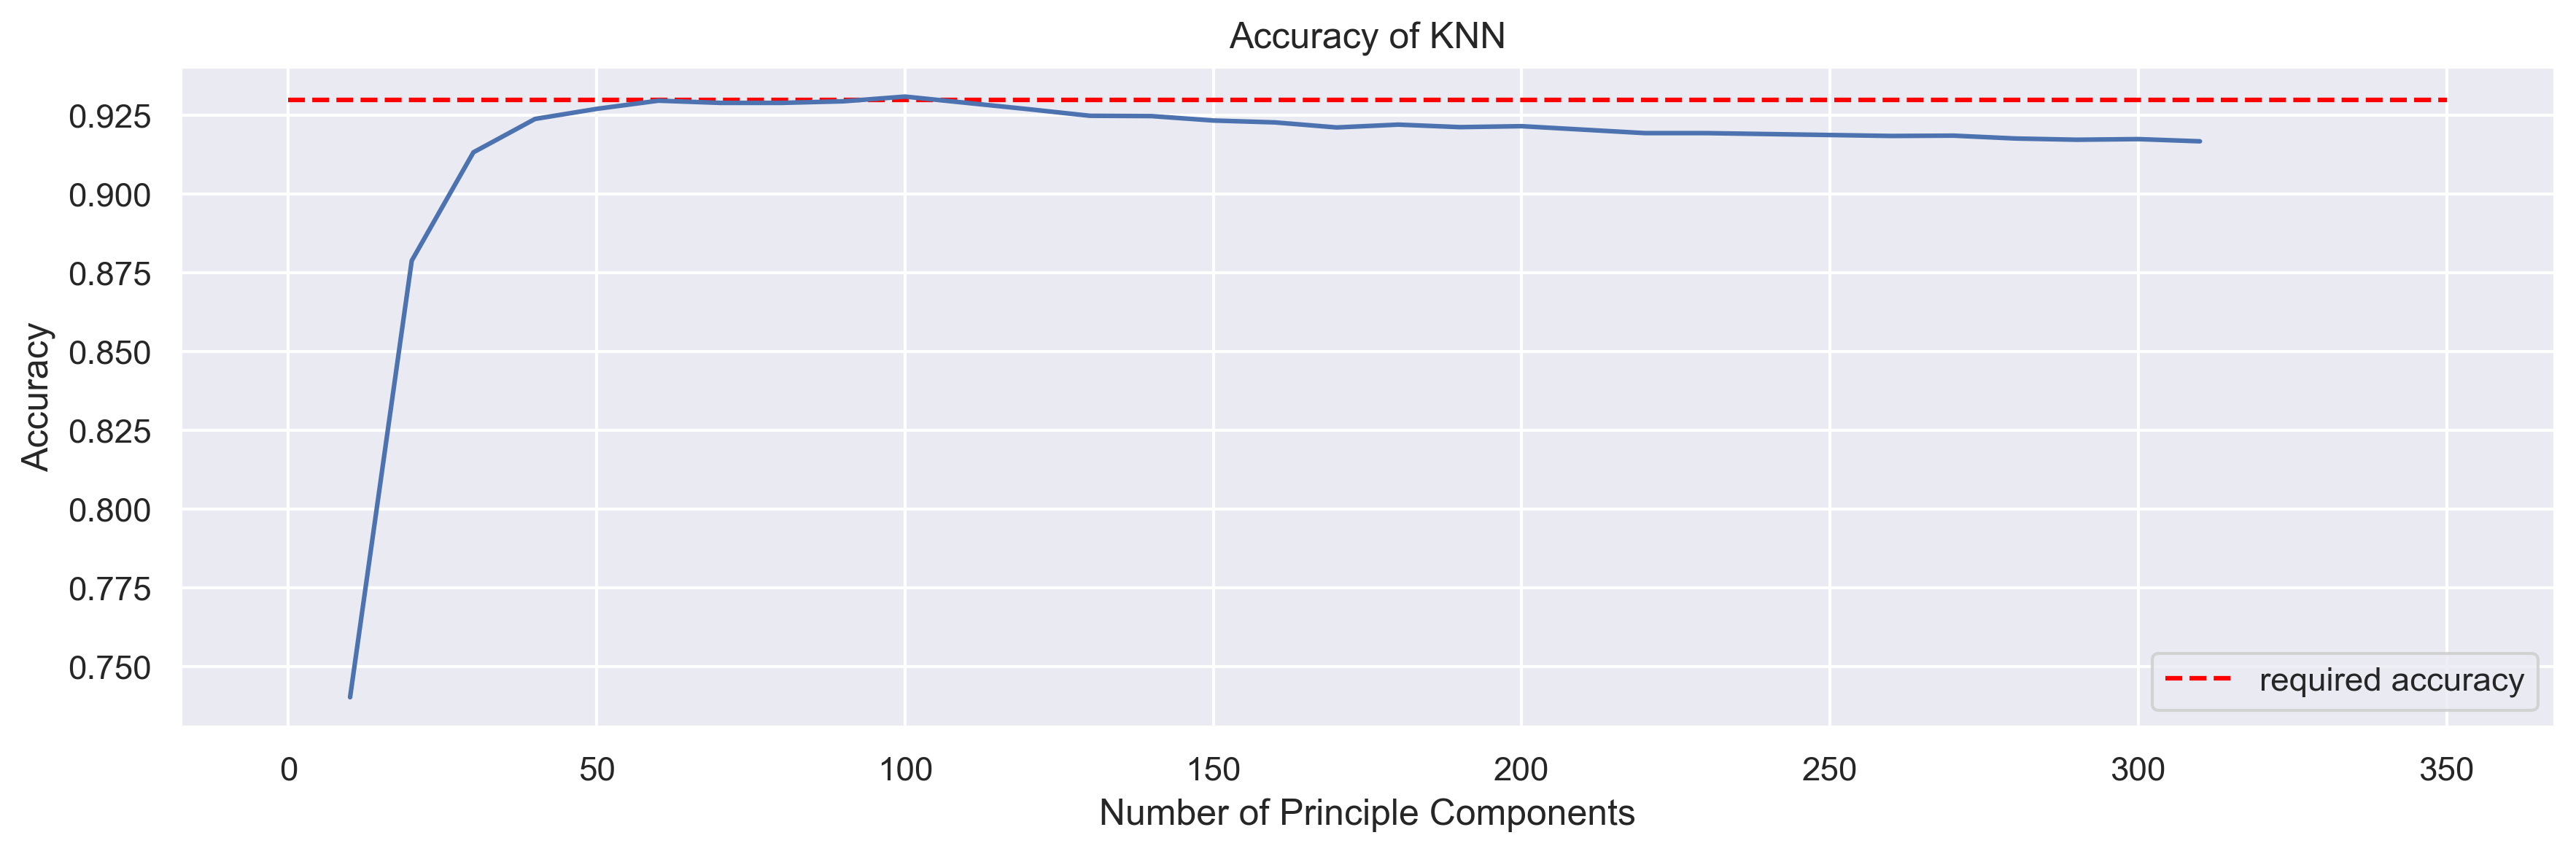

In [63]:
len(acc)

plt.figure(figsize=(14,4),dpi=300)
plt.plot(range(10,320,10),acc)
plt.hlines(0.93,0,350,linestyles='dashed',color='red', label='required accuracy')
plt.title('Accuracy of KNN')
plt.ylabel('Accuracy')
plt.xlabel('Number of Principle Components')
plt.legend(loc='lower right')
plt.grid()

**Discussion**

It's not fair to `fit` both `train` and `test` sets. We fit manifold learning algorithm on `train` set and trasfrom `test` set becasue we want to preserve general structure of the data which is represented by `train` set. If we fit both set seperately we would end up is totally different spaces in the same dimentionality

#### Voilla! you are done, have a good day ;)